In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn import linear_model

df = pd.read_csv(r'C:\project เอง\train.csv')

df.drop('Item_Weight',axis='columns', inplace=True)
df.drop('Outlet_Establishment_Year',axis='columns', inplace=True)
df.drop('Outlet_Size',axis='columns', inplace=True)
df.drop('Outlet_Location_Type',axis='columns', inplace=True)
print(df)


     Item_Identifier Item_Fat_Content  Item_Visibility              Item_Type  \
0              FDA15          Low Fat         0.016047                  Dairy   
1              DRC01          Regular         0.019278            Soft Drinks   
2              FDN15          Low Fat         0.016760                   Meat   
3              FDX07          Regular         0.000000  Fruits and Vegetables   
4              NCD19          Low Fat         0.000000              Household   
...              ...              ...              ...                    ...   
8518           FDF22          Low Fat         0.056783            Snack Foods   
8519           FDS36          Regular         0.046982           Baking Goods   
8520           NCJ29          Low Fat         0.035186     Health and Hygiene   
8521           FDN46          Regular         0.145221            Snack Foods   
8522           DRG01          Low Fat         0.044878            Soft Drinks   

      Item_MRP Outlet_Ident

In [20]:
print(df.describe())

       Item_Visibility     Item_MRP  Item_Outlet_Sales
count      8523.000000  8523.000000        8523.000000
mean          0.066132   140.992782        2181.288914
std           0.051598    62.275067        1706.499616
min           0.000000    31.290000          33.290000
25%           0.026989    93.826500         834.247400
50%           0.053931   143.012800        1794.331000
75%           0.094585   185.643700        3101.296400
max           0.328391   266.888400       13086.964800


Text(0, 0.5, 'cash')

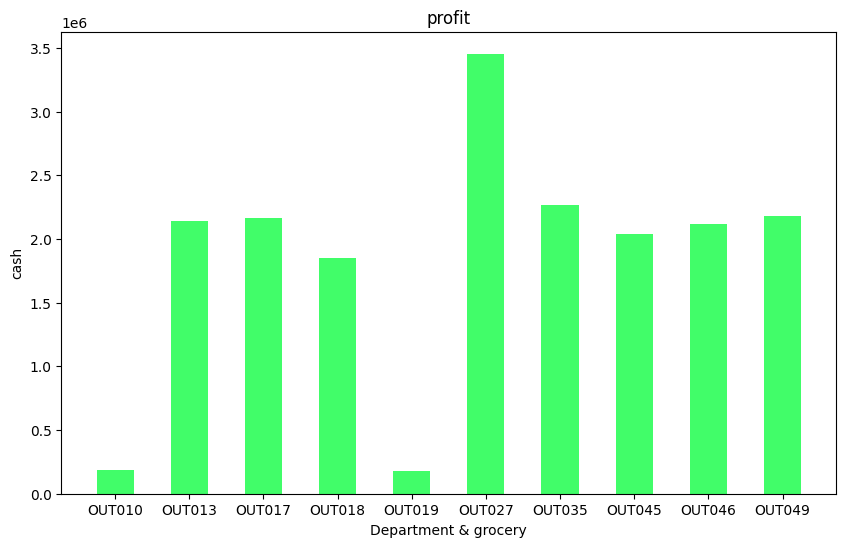

In [21]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i])
df=df.groupby('Outlet_Identifier')['Item_Outlet_Sales'].sum().to_frame().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(df['Outlet_Identifier'], df['Item_Outlet_Sales'], color=['#41FD69'], width=0.5)
# addlabels(df['Outlet_Identifier'], df['Item_Outlet_Sales'])
plt.title('profit')
plt.xlabel('Department & grocery')
plt.ylabel('cash')

Text(0, 0.5, 'MRP')

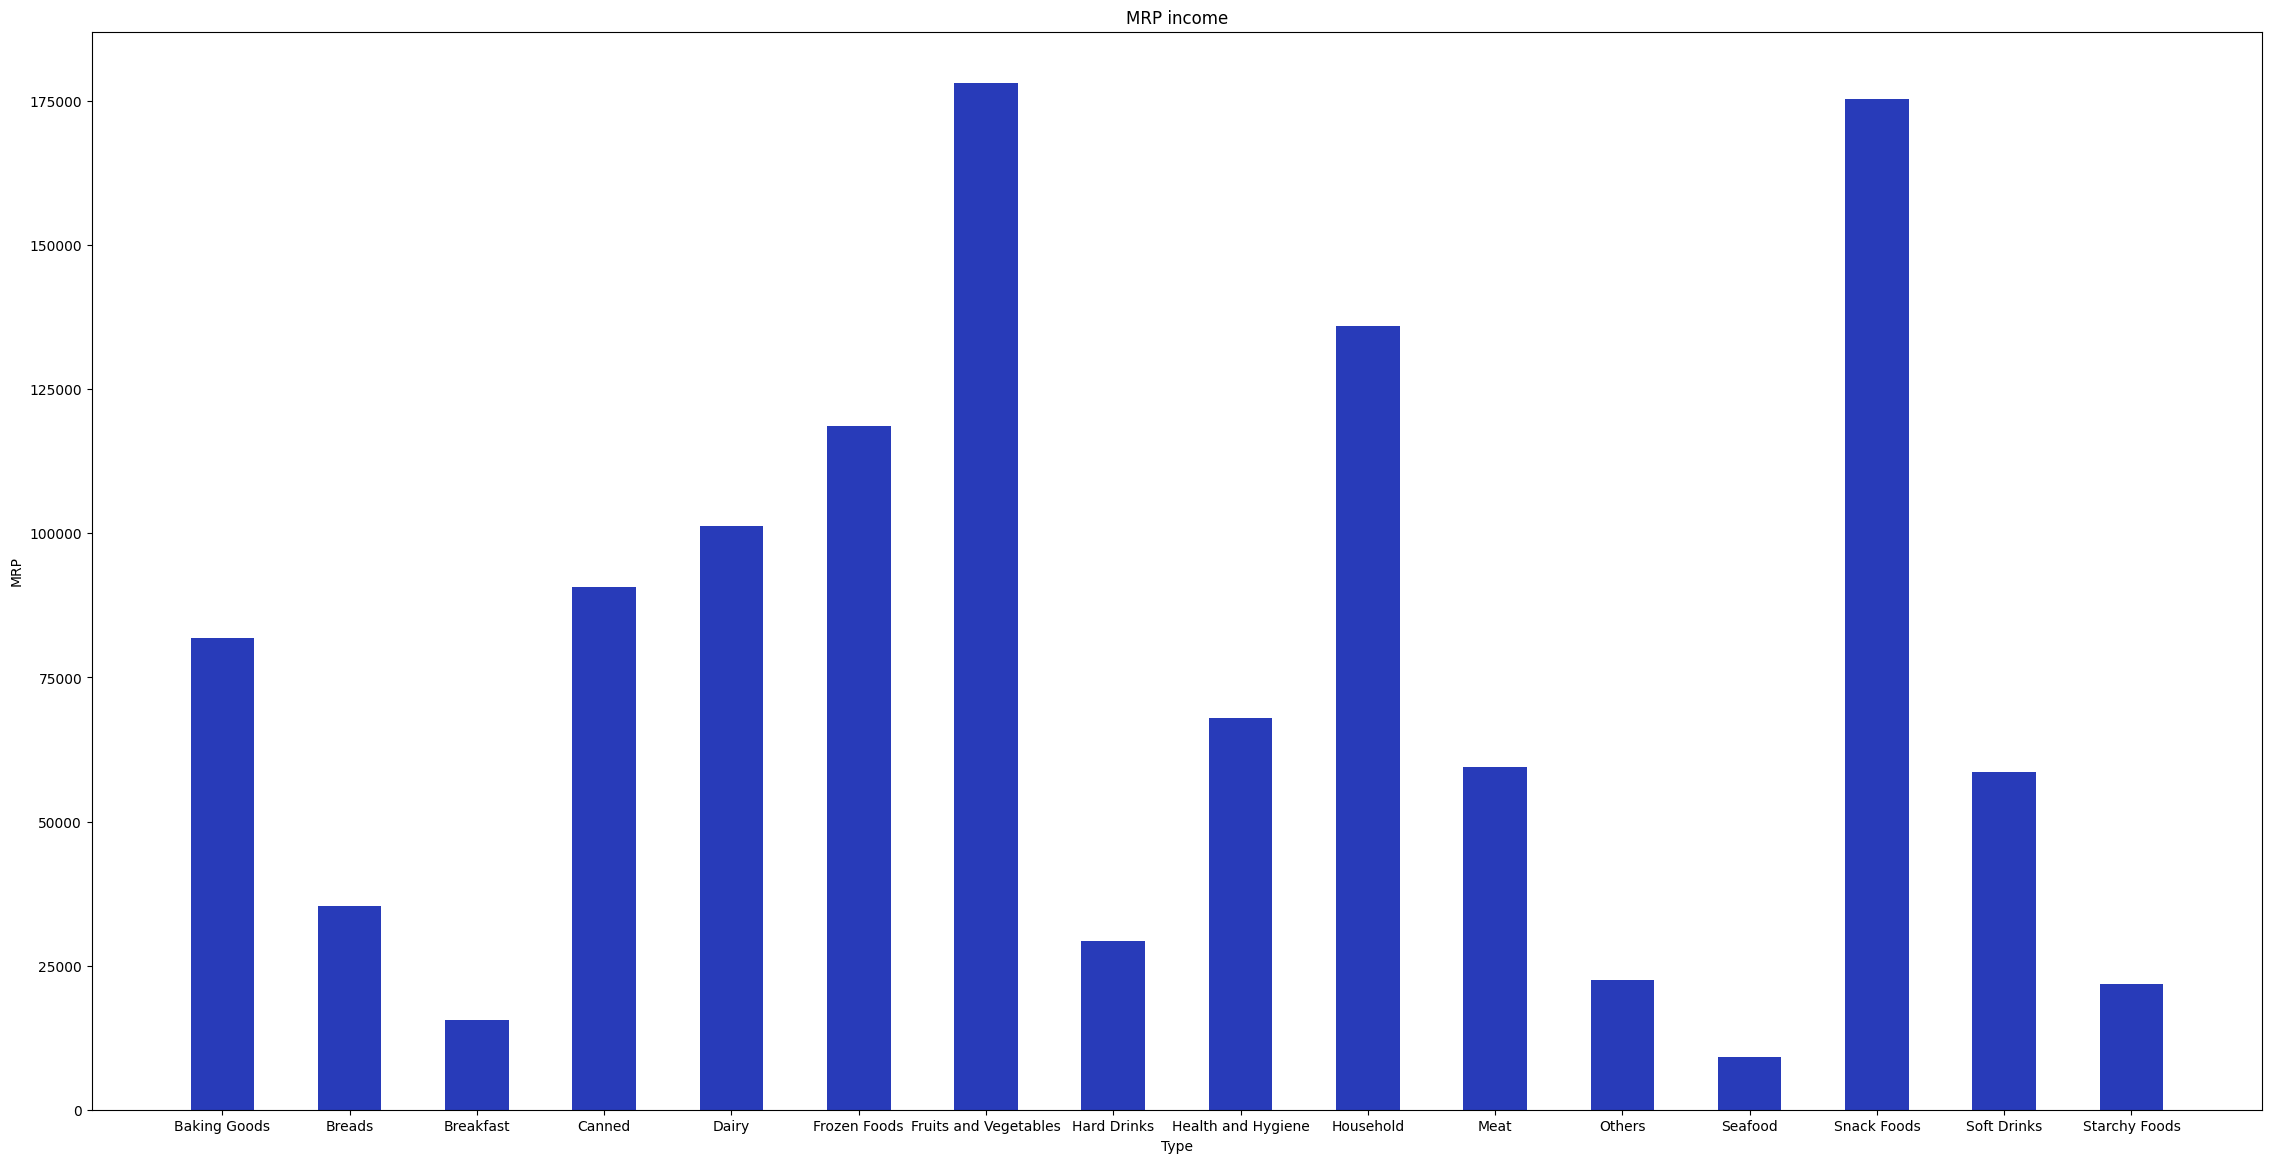

In [24]:
df=df.groupby('Item_Type')['Item_MRP'].sum().to_frame().reset_index()
plt.figure(figsize=(28, 14))
plt.bar(df['Item_Type'], df['Item_MRP'], color=['#283BB9'], width=0.5)
plt.title('MRP income')
plt.xlabel('Type')
plt.ylabel('MRP')

Text(0, 0.5, 'Item visibility')

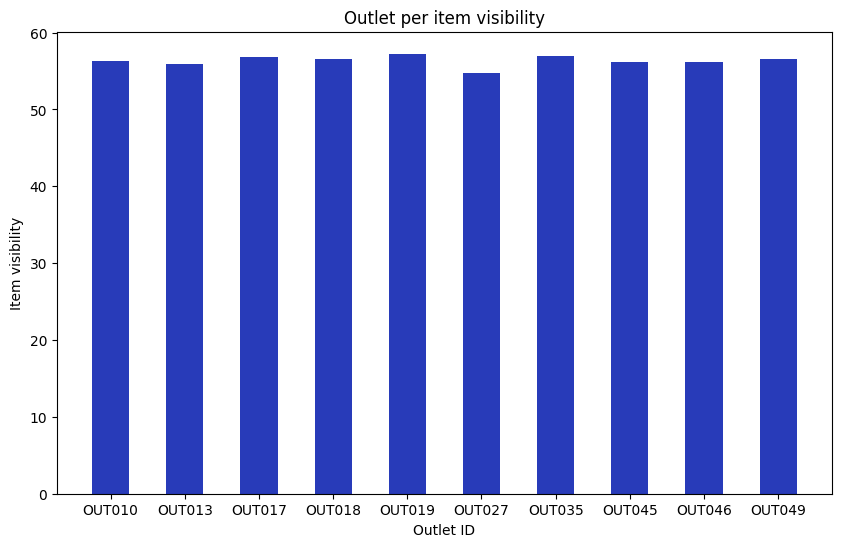

In [30]:
df=df.groupby('Outlet_Identifier')['Item_Visibility'].sum().to_frame().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(df['Outlet_Identifier'], df['Item_Visibility'], color=['#283BB9'], width=0.5)
plt.title('Outlet per item visibility')
plt.xlabel('Outlet ID')
plt.ylabel('Item visibility')

In [ ]:
X=df[['Item_MRP']]
y=df['Item_Outlet_Sales']
slope, intercept, r, p, std_err = stats.linregress(X,y)

def myfunc(x):
    return slope*x+intercept

df=list(map(myfunc, X))
print('Slope = '+str(slope))
print('Intercept = '+str(intercept))
print('Relationship is '+str(r))

In [ ]:
X = df['Item_Visibility']
y = df['Item_Outlet_Sales']

slope, intercept, r, p, std_err = stats.linregress(X, y)

def myfunc(x):
    return slope * x + intercept

predicted_y = list(map(myfunc, X))

print('Slope = ' + str(slope))
print('Intercept = ' + str(intercept))
print('Relationship is ' + str(r))

Slope = -4254.013860556835
Intercept = 2462.6154806274335
Relationship is -0.12862461222077023


In [ ]:
from sklearn.metrics import mean_squared_error

X = df['Item_Visibility'].values.reshape(-1, 1)
y = df['Item_Outlet_Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print('Mean Squared Error:', mse)

Mean Squared Error: 2708499.703885258


In [ ]:
X = df['Item_Visibility'].values.reshape(-1, 1)
y = df['Item_Outlet_Sales']

reg = LinearRegression()
reg.fit(X, y)

print(reg.coef_)

c:\Users\User\Desktop\Test py\For python in vs\BasePython\lib\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\Desktop\Test py\For python in vs\BasePython\lib\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


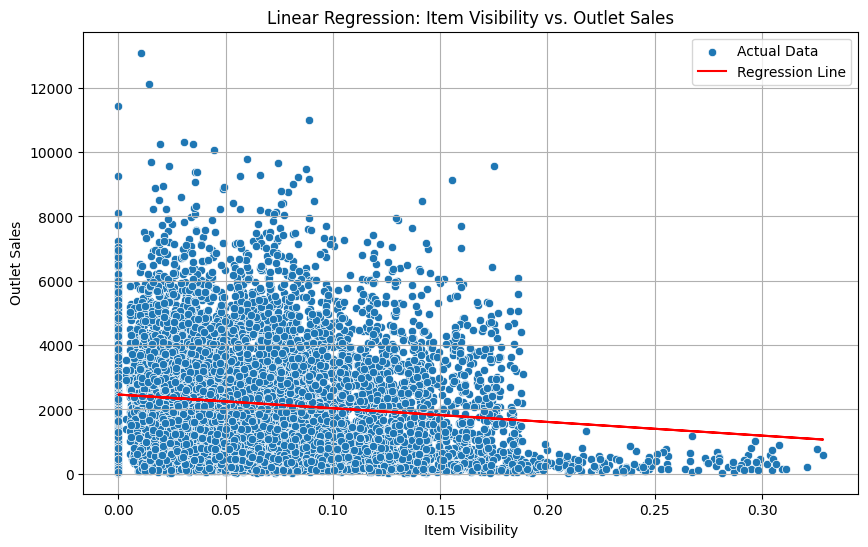

In [ ]:
X = df['Item_Visibility']
y = df['Item_Outlet_Sales']

slope, intercept, r, p, std_err = stats.linregress(X, y)

def myfunc(x):
    return slope * x + intercept

predicted_y = list(map(myfunc, X))

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X, y=y, label='Actual Data')

# Plotting the regression line
plt.plot(X, predicted_y, label='Regression Line', color='red')

plt.title('Linear Regression: Item Visibility vs. Outlet Sales')
plt.xlabel('Item Visibility')
plt.ylabel('Outlet Sales')
plt.legend()
plt.grid(True)
plt.show()